In [ ]:
!apt install ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.11-0ubuntu0.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


In [ ]:
!pip3 install SpeechRecognition pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 32.8 MB 1.2 MB/s 


In [ ]:
# import the necessary packages
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from imutils import paths
import matplotlib.pyplot as plt
import argparse
import cv2
import os
import pandas as pd
import keras
from keras.models import *
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
import matplotlib.pyplot as plt
import numpy as np
from skimage.util.dtype import convert
from pathlib import Path
import speech_recognition as sr

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/kaggle_dataset/cv-other-test.zip

Archive:  /content/drive/MyDrive/kaggle_dataset/cv-other-test.zip
   creating: cv-other-test/
  inflating: cv-other-test/sample-000220.mp3  
  inflating: cv-other-test/sample-000207.mp3  
  inflating: cv-other-test/sample-000801.mp3  
  inflating: cv-other-test/sample-001312.mp3  
  inflating: cv-other-test/sample-001948.mp3  
  inflating: cv-other-test/sample-001633.mp3  
  inflating: cv-other-test/sample-001268.mp3  
  inflating: cv-other-test/sample-002813.mp3  
  inflating: cv-other-test/sample-002851.mp3  
  inflating: cv-other-test/sample-002214.mp3  
  inflating: cv-other-test/sample-001983.mp3  
  inflating: cv-other-test/sample-000328.mp3  
  inflating: cv-other-test/sample-000584.mp3  
  inflating: cv-other-test/sample-000568.mp3  
  inflating: cv-other-test/sample-001313.mp3  
  inflating: cv-other-test/sample-000479.mp3  
  inflating: cv-other-test/sample-000529.mp3  
  inflating: cv-other-test/sample-002351.mp3  
  inflating: cv-other-test/sample-002087.mp3  
  inflating: 

In [ ]:
import pandas as pd

# Load the csv-file which contains already extracted features
df = pd.read_csv("/content/drive/MyDrive/kaggle_dataset/cv-other-test.csv")
# df.dropna(inplace=True)
df

,filename,text,up_votes,down_votes,age,gender,accent,duration
0,cv-other-test/sample-000000.mp3,you killed all three of them for nothing,0,0,NaN,NaN,NaN,NaN
1,cv-other-test/sample-000001.mp3,will it be warmer in montana,0,0,NaN,NaN,NaN,NaN
2,cv-other-test/sample-000002.mp3,science has been arguing about the zoological ...,0,0,thirties,male,NaN,NaN
3,cv-other-test/sample-000003.mp3,he wasn't asking for help,1,1,NaN,NaN,NaN,NaN
4,cv-other-test/sample-000004.mp3,but he granted the travelers three days,0,0,sixties,male,us,NaN
...,...,...,...,...,...,...,...,...
2956,cv-other-test/sample-002956.mp3,what do you mean by that,0,0,NaN,NaN,NaN,NaN
2957,cv-other-test/sample-002957.mp3,how long will it take to get him examined,0,0,NaN,NaN,NaN,NaN
2958,cv-other-test/sample-002958.mp3,stacey couldn't find the power switch,0,0,NaN,NaN,NaN,NaN
2959,cv-other-test/sample-002959.mp3,and the girl pointed to the south indicating t...,0,0,teens,male,NaN,NaN


In [ ]:
df[df['age'].notna()].head()

,filename,text,up_votes,down_votes,age,gender,accent,duration
2,cv-other-test/sample-000002.mp3,science has been arguing about the zoological ...,0,0,thirties,male,NaN,NaN
4,cv-other-test/sample-000004.mp3,but he granted the travelers three days,0,0,sixties,male,us,NaN
5,cv-other-test/sample-000005.mp3,pull this lever to activate the piston,0,0,thirties,male,australia,NaN
6,cv-other-test/sample-000006.mp3,she likes you,0,0,twenties,male,NaN,NaN
7,cv-other-test/sample-000007.mp3,they'll believe him,0,0,fifties,female,us,NaN


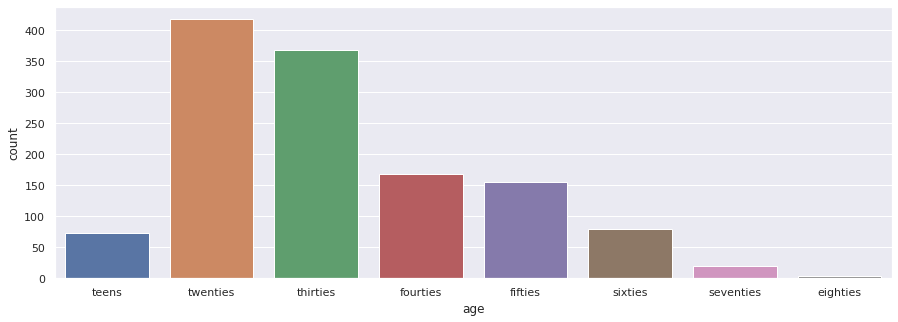

In [ ]:
import seaborn as sns # visualizing data with stunning default theme
import sklearn # contain algorithms
import warnings
sns.set(rc={'figure.figsize':(15, 5)})
sns.countplot(x="age",
        data=df[df['age'].notna()],
        order=['teens', 'twenties', 'thirties', 'fourties', 'fifties', 'sixties', 'seventies', 'eighties'])

plt.show()

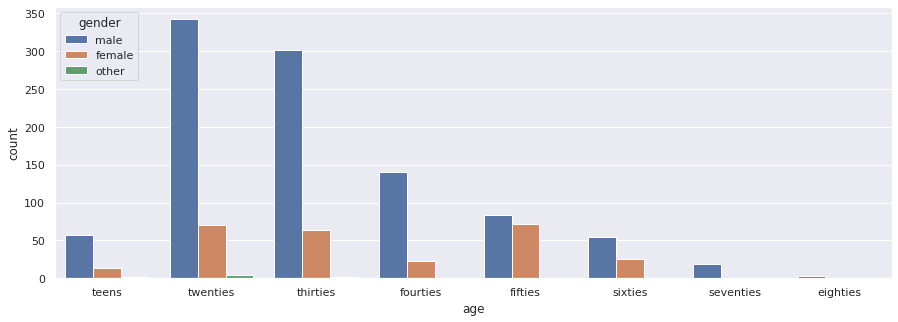

In [ ]:
sns.countplot(x="age",
        hue='gender',
        data=df[df['age'].notna()],
        order=['teens', 'twenties', 'thirties', 'fourties', 'fifties', 'sixties', 'seventies', 'eighties'])

plt.show()

In [ ]:
#we extract the columns that we think useful are
df = df[['filename','age','gender']]
#To clean the data we remove the sample with NaN attribute values.
data = df[df['age'].notna() & df['gender'].notna()]
data.reset_index(inplace=True, drop=True)
data.head()

,filename,age,gender
0,cv-other-test/sample-000002.mp3,thirties,male
1,cv-other-test/sample-000004.mp3,sixties,male
2,cv-other-test/sample-000005.mp3,thirties,male
3,cv-other-test/sample-000006.mp3,twenties,male
4,cv-other-test/sample-000007.mp3,fifties,female


In [ ]:
#data['gender'] = pd.to_numeric(data['gender'],errors = 'coerce')
#data.dtypes
#if the below code fail to covert gender datatype and values then uncomment above code
cleanup_nums = {"age": {"teens":0,"twenties":1,"thirties":2,"fourties":3,"fifties":4,"sixties":5,"seventies":6,"twenties":7,"eighties":8},
                "gender": {"male":0,"female":1,"other":2}}
data = data.replace(cleanup_nums)
data.head()

,filename,age,gender
0,cv-other-test/sample-000002.mp3,2,0
1,cv-other-test/sample-000004.mp3,5,0
2,cv-other-test/sample-000005.mp3,2,0
3,cv-other-test/sample-000006.mp3,7,0
4,cv-other-test/sample-000007.mp3,4,1


In [ ]:
np.unique(data["gender"])

array([0, 1, 2])

In [ ]:
import librosa
audio=[]
features=[]
files =Path('/content/cv-other-test').glob('*')
i=0
for myFile in files:
  voice_name = str(myFile)[9:]
  voice, sampling_rate = librosa.load(myFile)
  if voice_name in data['filename'].values :
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=voice, sr=sampling_rate))
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=voice, sr=sampling_rate))
    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=voice, sr=sampling_rate))
    mfcc = librosa.feature.mfcc(y=voice, sr=sampling_rate, n_mfcc= 50)
    features.append([spectral_centroid,spectral_bandwidth,spectral_rolloff])
    for el in mfcc:
        audio.append(np.mean(el))

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")

In [ ]:
print(audio)

[-441.58185, 60.046364, -26.34906, 37.396206, 1.9290699, -5.4434676, -17.41759, -4.7139893, -9.88519, 0.91359675, -13.009681, -2.1530864, -5.472524, -3.084571, -4.858646, -0.34778517, -5.4838867, 0.23889525, -4.7981005, -0.8973487, -8.319948, 1.2303754, -6.2829227, -2.089431, -5.429012, -0.23462953, -2.774686, -1.0558323, -2.695236, 0.28424403, -1.6870925, -1.3321885, -1.7064755, -1.7295717, -1.9822464, -1.9849682, -2.3106675, -0.9317885, -2.564715, -0.90009964, -2.066095, -1.0680946, -1.6942217, -1.241471, -1.1108102, -1.6133304, -1.1495668, -1.0122645, -0.897828, -1.8624749, -401.04495, 102.9483, 28.527689, 15.212417, 9.062133, -8.450055, -12.008293, -4.9569354, 0.22232164, -3.393037, -6.214575, 1.7653439, 0.68210435, 4.0093436, 3.72604, 2.7981877, -6.882574, 2.5154421, -6.057045, 1.3403484, -8.685732, 1.2404928, -7.309005, 0.8359297, -4.5895505, -4.370667, -7.777812, -1.2502546, -3.1053598, -2.501515, -4.3029284, 0.0020468698, -3.9744163, -3.7095447, -4.126323, -2.1854808, -0.591918

In [ ]:
features=np.array(features)
audio=np.reshape(audio,(-1,50))
audio.shape

(1278, 50)

In [ ]:
features

array([[3103.00128757, 2159.07600443, 5540.22399902],
       [2414.74215426, 2357.88354723, 4934.79951318],
       [3396.75594515, 1887.15671707, 5363.26989462],
       ...,
       [1585.89280186, 1503.75013475, 3121.33567116],
       [2110.92759325, 1692.49388712, 3946.99472281],
       [3276.32731016, 2714.19309276, 6541.50333848]])

In [ ]:
audio

array([[-4.4158185e+02,  6.0046364e+01, -2.6349060e+01, ...,
        -1.0122645e+00, -8.9782798e-01, -1.8624749e+00],
       [-4.0104495e+02,  1.0294830e+02,  2.8527689e+01, ...,
         1.5347040e+00,  1.4793757e+00,  1.7572099e+00],
       [-3.3117471e+02,  5.5237190e+01, -2.6432274e+01, ...,
        -1.1885650e-02,  2.7640839e+00,  1.1097891e+00],
       ...,
       [-4.2158231e+02,  1.0039251e+02,  2.2959058e+00, ...,
         9.0995508e-01, -1.0036912e+00, -7.8751111e-01],
       [-3.4116013e+02,  7.0834763e+01, -3.8418858e+01, ...,
         6.6801220e-01,  1.8308692e+00,  3.5217309e+00],
       [-3.6217346e+02,  5.2793800e+01, -5.9455605e+00, ...,
         2.4302652e-02,  1.3116132e+00,  1.1488945e+00]], dtype=float32)

In [ ]:
features = np.concatenate((features, audio), axis=1)
print(features)

[[ 3.10300129e+03  2.15907600e+03  5.54022400e+03 ... -1.01226449e+00
  -8.97827983e-01 -1.86247492e+00]
 [ 2.41474215e+03  2.35788355e+03  4.93479951e+03 ...  1.53470397e+00
   1.47937572e+00  1.75720990e+00]
 [ 3.39675595e+03  1.88715672e+03  5.36326989e+03 ... -1.18856505e-02
   2.76408386e+00  1.10978913e+00]
 ...
 [ 1.58589280e+03  1.50375013e+03  3.12133567e+03 ...  9.09955084e-01
  -1.00369120e+00 -7.87511110e-01]
 [ 2.11092759e+03  1.69249389e+03  3.94699472e+03 ...  6.68012202e-01
   1.83086920e+00  3.52173090e+00]
 [ 3.27632731e+03  2.71419309e+03  6.54150334e+03 ...  2.43026521e-02
   1.31161320e+00  1.14889455e+00]]


In [ ]:
print("features: ", features[0])

features:  [ 3.10300129e+03  2.15907600e+03  5.54022400e+03 -4.41581848e+02
  6.00463638e+01 -2.63490601e+01  3.73962059e+01  1.92906988e+00
 -5.44346762e+00 -1.74175892e+01 -4.71398926e+00 -9.88519001e+00
  9.13596749e-01 -1.30096807e+01 -2.15308642e+00 -5.47252417e+00
 -3.08457088e+00 -4.85864592e+00 -3.47785175e-01 -5.48388672e+00
  2.38895252e-01 -4.79810047e+00 -8.97348702e-01 -8.31994820e+00
  1.23037541e+00 -6.28292274e+00 -2.08943105e+00 -5.42901182e+00
 -2.34629527e-01 -2.77468610e+00 -1.05583227e+00 -2.69523597e+00
  2.84244031e-01 -1.68709254e+00 -1.33218849e+00 -1.70647550e+00
 -1.72957170e+00 -1.98224640e+00 -1.98496819e+00 -2.31066751e+00
 -9.31788504e-01 -2.56471491e+00 -9.00099635e-01 -2.06609511e+00
 -1.06809461e+00 -1.69422174e+00 -1.24147105e+00 -1.11081016e+00
 -1.61333036e+00 -1.14956677e+00 -1.01226449e+00 -8.97827983e-01
 -1.86247492e+00]


In [ ]:
# features=np.array(features)
features.shape

(1278, 53)

In [ ]:
features[:,2].shape

(1278,)

In [ ]:
len(data.gender)

1278

In [ ]:
features[:,2]

array([5540.22399902, 4934.79951318, 5363.26989462, ..., 3121.33567116,
       3946.99472281, 6541.50333848])

In [ ]:
df = pd.DataFrame(features, columns=['Age', 'spectral_centroid', 'spectral_bandwidth', 'spectral_rolloff' ,
                                     'mmfc1','mmfc2','mmfc3','mmfc4','mmfc5','mmfc6','mmfc7','mmfc8','mmfc9','mmfc10',
                                     'mmfc11','mmfc12','mmfc13','mmfc14','mmfc15','mmfc16','mmfc','mmfc17','mmfc18','mmfc19',
                                     'mmfc20','mmfc21','mmfc22','mmfc23','mmfc24','mmfc25','mmfc26','mmfc27','mmfc28','mmfc29',
                                     'mmfc30','mmfc31','mmfc32','mmfc33','mmfc34','mmfc35','mmfc36','mmfc37','mmfc38','mmfc39',
                                     'mmfc40','mmfc41','mmfc42','mmfc43','mmfc44','mmfc45','mmfc46','mmfc47','mmfc48'])

In [ ]:
df.Age=data.age

In [ ]:
#from pandas.tseries.frequencies import unique
np.unique(df.Age)

array([0, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
df

,Age,spectral_centroid,spectral_bandwidth,spectral_rolloff,mmfc1,mmfc2,mmfc3,mmfc4,mmfc5,mmfc6,...,mmfc39,mmfc40,mmfc41,mmfc42,mmfc43,mmfc44,mmfc45,mmfc46,mmfc47,mmfc48
0,2,2159.076004,5540.223999,-441.581848,60.046364,-26.349060,37.396206,1.929070,-5.443468,-17.417589,...,-2.066095,-1.068095,-1.694222,-1.241471,-1.110810,-1.613330,-1.149567,-1.012264,-0.897828,-1.862475
1,5,2357.883547,4934.799513,-401.044952,102.948303,28.527689,15.212417,9.062133,-8.450055,-12.008293,...,-3.358442,-3.135557,0.221529,-1.417634,-1.295437,0.759694,2.697848,1.534704,1.479376,1.757210
2,2,1887.156717,5363.269895,-331.174713,55.237190,-26.432274,49.635189,-34.280590,27.111490,-22.323637,...,-1.613219,0.935860,0.619182,0.836341,0.312335,-1.115253,1.089550,-0.011886,2.764084,1.109789
3,7,2547.155727,6062.680111,-492.576935,62.774887,4.229623,13.008132,-14.084250,-2.252344,-16.712303,...,1.364577,3.257232,3.157887,1.960239,0.418455,1.356722,0.500417,0.640846,1.392803,1.070760
4,4,2093.961763,4696.014216,-396.274200,56.285126,-8.955915,18.489641,-19.453445,9.784649,-8.944714,...,-2.125044,1.944368,0.000601,2.978521,-0.452528,0.253134,1.074746,0.721575,0.566958,-0.253591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1273,7,2055.733157,4194.195850,-418.251678,102.159172,0.381921,29.876205,-7.523500,-14.199360,-16.161880,...,-0.837711,-1.150756,-0.763060,-0.642026,0.158793,-0.360641,-0.419705,-1.326426,-1.147052,-1.052798
1274,3,1814.394514,3159.749792,-304.609375,83.184898,16.381689,35.252010,13.526512,11.586377,-1.184177,...,-1.710175,-4.026269,-2.899732,-2.443168,-2.198843,-1.058178,-1.923115,-3.672601,-2.720676,-1.874029
1275,4,1503.750135,3121.335671,-421.582306,100.392509,2.295906,-3.974474,-11.981335,-3.382489,-7.458195,...,1.147478,3.410916,3.564606,4.097277,1.817657,0.648480,1.010738,0.909955,-1.003691,-0.787511
1276,7,1692.493887,3946.994723,-341.160126,70.834763,-38.418858,45.471809,0.697868,4.035522,-9.359345,...,-1.491720,-0.115533,-1.279014,-1.473588,-1.993101,-0.803885,-0.508304,0.668012,1.830869,3.521731


In [ ]:
gender=data['gender']
gender=np.array(gender)
gender.shape

(1278,)

In [ ]:
x=df.iloc[:,1:53]
y=df.iloc[:,0]

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


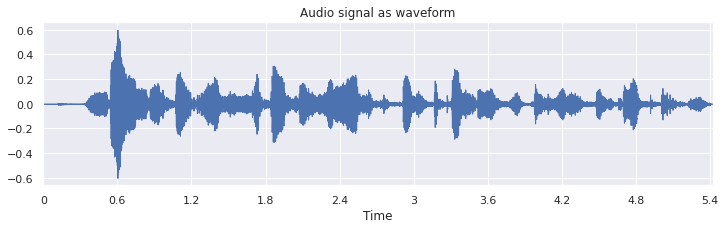

In [ ]:
# Import librosa
import librosa

# Loads mp3 file with a specific sampling rate, here 16kHz
y, sr = librosa.load("/content/cv-other-test/sample-000002.mp3", sr=16_000)

# Plot the signal stored in 'y'
from matplotlib import pyplot as plt
import librosa.display

plt.figure(figsize=(12, 3))
plt.title("Audio signal as waveform")
librosa.display.waveplot(y, sr=sr);

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


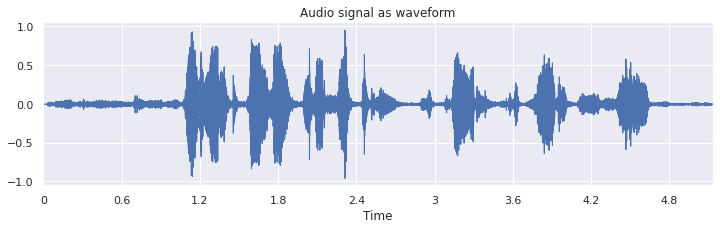

In [ ]:
# Import librosa
import librosa

# Loads mp3 file with a specific sampling rate, here 16kHz
y, sr = librosa.load("/content/cv-other-test/sample-000008.mp3", sr=16_000)

# Plot the signal stored in 'y'
from matplotlib import pyplot as plt
import librosa.display

plt.figure(figsize=(12, 3))
plt.title("Audio signal as waveform")
librosa.display.waveplot(y, sr=sr);

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=45)

In [ ]:
x_train.shape

(894, 52)

In [ ]:
y_train.shape

(894,)

In [ ]:
print(np.unique(y_train))

[0 2 3 4 5 6 7 8]


In [ ]:
model=Sequential()
model.add(Dense(9,activation='softmax',input_shape=(52,)))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 9)                 477       
                                                                 
Total params: 477
Trainable params: 477
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train,y_train,epochs=1000,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/1000
28/28 [==============================] - 0s 7ms/step - loss: 1170.8756 - accuracy: 0.0604 - val_loss: 955.5913 - val_accuracy: 0.0599
Epoch 2/1000
28/28 [==============================] - 0s 2ms/step - loss: 876.8353 - accuracy: 0.1745 - val_loss: 741.0507 - val_accuracy: 0.1927
Epoch 3/1000
28/28 [==============================] - 0s 2ms/step - loss: 699.5859 - accuracy: 0.1700 - val_loss: 597.5051 - val_accuracy: 0.1875
Epoch 4/1000
28/28 [==============================] - 0s 2ms/step - loss: 552.9605 - accuracy: 0.1756 - val_loss: 456.9662 - val_accuracy: 0.1849
Epoch 5/1000
28/28 [==============================] - 0s 2ms/step - loss: 404.4859 - accuracy: 0.1667 - val_loss: 311.0038 - val_accuracy: 0.1875
Epoch 6/1000
28/28 [==============================] - 0s 2ms/step - loss: 251.1203 - accuracy: 0.1689 - val_loss: 167.3829 - val_accuracy: 0.1823
Epoch 7/1000
28/28 [==============================] - 0s 2ms/step - loss: 115.1880 - accuracy: 0.2002 - val_loss: 71.8889 -

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.2734375


In [ ]:
pred=model.predict(x_test)
print(pred)

[[9.99633074e-01 3.66856984e-04 4.54059098e-22]
 [9.90756214e-01 9.24380589e-03 9.20694835e-13]
 [9.99581993e-01 4.18042036e-04 2.86468216e-15]
 [9.92395282e-01 7.60471448e-03 3.33194068e-16]
 [9.99482214e-01 5.17790439e-04 4.09402640e-20]
 [8.46312940e-01 1.53687060e-01 1.74289116e-09]
 [9.94306147e-01 5.69389202e-03 9.57325907e-13]
 [9.95420277e-01 4.57973871e-03 1.03505362e-15]
 [9.96535778e-01 3.46422358e-03 1.32931394e-12]
 [9.99576151e-01 4.23833029e-04 1.10993808e-16]
 [9.98405159e-01 1.59490295e-03 2.20631578e-13]
 [9.99051988e-01 9.48002387e-04 7.19342058e-19]
 [9.05436039e-01 9.45639759e-02 7.51468072e-12]
 [9.94343281e-01 5.65678021e-03 8.20811041e-12]
 [9.99683738e-01 3.16283404e-04 8.13294963e-17]
 [9.98930037e-01 1.06991699e-03 1.22502691e-14]
 [9.99917746e-01 8.22332513e-05 6.41323469e-19]
 [9.99623537e-01 3.76430951e-04 2.15014570e-13]
 [9.98098433e-01 1.90162065e-03 3.68199584e-16]
 [9.99897838e-01 1.02193000e-04 1.00803848e-18]
 [9.96613562e-01 3.38648586e-03 1.876050

In [ ]:
from pandas.tseries.frequencies import unique
np.unique(y_test)

array([0, 1, 2])

In [ ]:
pred=np.argmax(pred,axis=1)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
accuracy_score(pred,y_test)

0.79296875